10/18/2022
Finalizing the dataset and compare inbound with non-inbound users

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re, nltk
import string

In [2]:
df = pd.read_csv('twcs.csv')

Comparing inbound and outbound users

In [3]:
#Top users analysis
top_users=df['author_id'].value_counts()[:10]
tu = top_users.reset_index(level=0)

In [4]:
#Top inbound users analysis
ndf = df[df.inbound != 0]
top_inusers=ndf['author_id'].value_counts()[:10]

In [5]:
#Top non-inbound users analysis
odf = df[df.inbound == 0]

Text(0, 0.5, 'Number of Tweets')

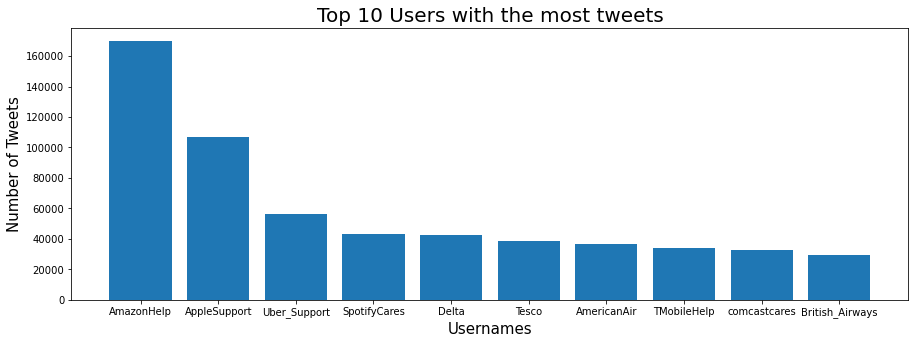

In [6]:
#Top 10 users
fig = plt.figure(figsize = (15, 5))
plt.bar(tu['index'],tu['author_id'])
plt.title("Top 10 Users with the most tweets", fontsize = 20)
plt.xlabel("Usernames", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)

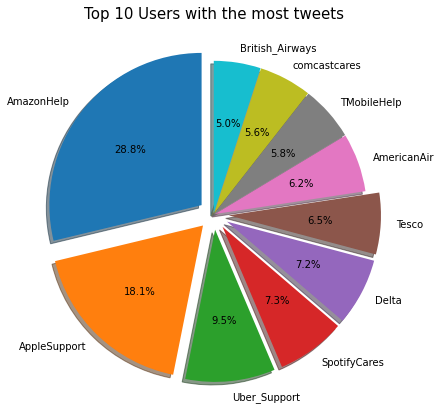

In [7]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(tu['author_id'], labels = tu['index'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 Users with the most tweets", fontsize = 15)

plt.show()

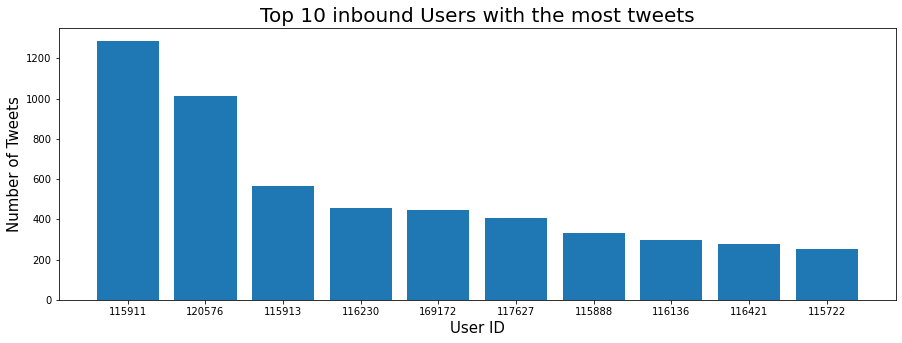

In [8]:
#Top 10 inbound users
import seaborn as sns

top_inusers=ndf['author_id'].value_counts()[:10]
intu = top_inusers.reset_index(level=0)
fig = plt.figure(figsize = (15, 5))
plt.bar(intu['index'],intu['author_id'])

plt.title("Top 10 inbound Users with the most tweets", fontsize = 20)
plt.xlabel("User ID", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)
plt.show()


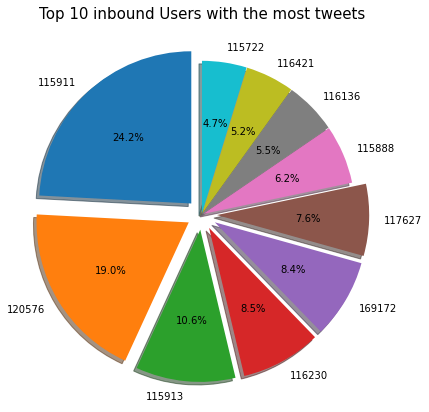

In [9]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(intu['author_id'], labels = intu['index'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 inbound Users with the most tweets", fontsize = 15)

plt.show()

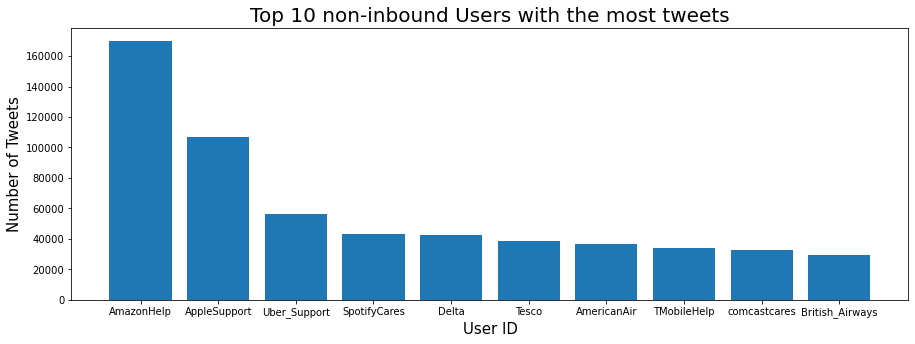

In [10]:
#Top 10 outbound users
top_outusers=odf['author_id'].value_counts()[:10]
outtu = top_outusers.reset_index(level=0)
top_inusers=ndf['author_id'].value_counts()[:10]
intu = top_inusers.reset_index(level=0)
fig = plt.figure(figsize = (15, 5))
plt.bar(outtu['index'],outtu['author_id'])
#plt.bar(intu['index'],intu['author_id'])

plt.title("Top 10 non-inbound Users with the most tweets", fontsize = 20)
plt.xlabel("User ID", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)
plt.show()

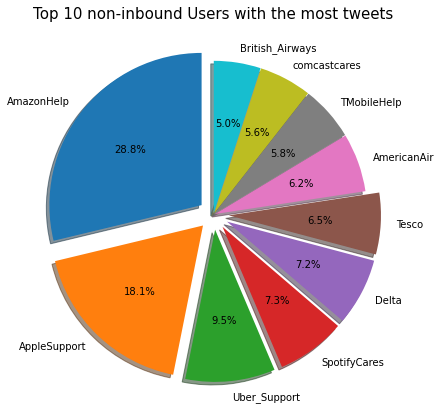

In [11]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(outtu['author_id'], labels = outtu['index'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 non-inbound Users with the most tweets", fontsize = 15)

plt.show()

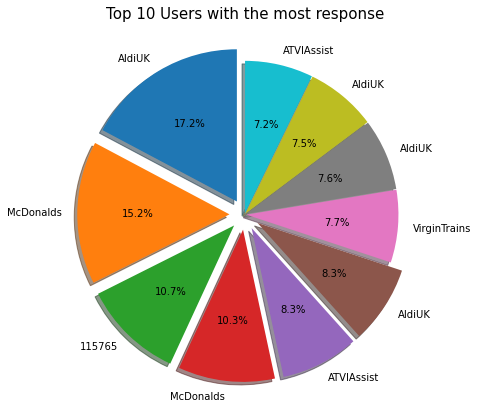

In [12]:
#Users with the most response tweet
rdf = df[df['response_tweet_id'].notnull()]

rcount = rdf['response_tweet_id'].apply(lambda x: len(x.split(',')))
rcdf = pd.DataFrame({'author_id': df['author_id'],
     'response_tweet_id': df['response_tweet_id'],
     'response_count': rcount
    })
rcdf.sort_values(by="response_count", ascending=False)
rcdf_10 = rcdf.sort_values(by="response_count", ascending=False)[:10]
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(rcdf_10['response_count'], labels = rcdf_10['author_id'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 Users with the most response", fontsize = 15)

plt.show()

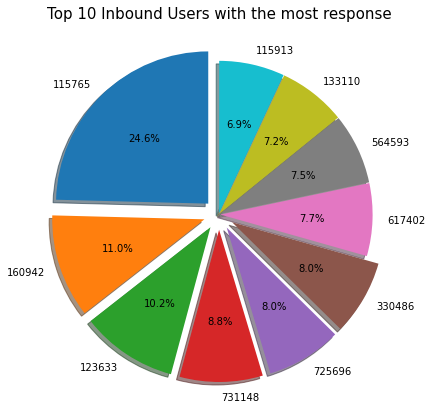

In [13]:
#Top inbound response
irdf = ndf[ndf['response_tweet_id'].notnull()]

ircount = irdf['response_tweet_id'].apply(lambda x: len(x.split(',')))
ircdf = pd.DataFrame({'author_id': ndf['author_id'],
     'response_tweet_id': ndf['response_tweet_id'],
     'response_count': ircount
    })
ircdf_10 = ircdf.sort_values(by="response_count", ascending=False)[:10]
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(ircdf_10['response_count'], labels = ircdf_10['author_id'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 Inbound Users with the most response", fontsize = 15)

plt.show()

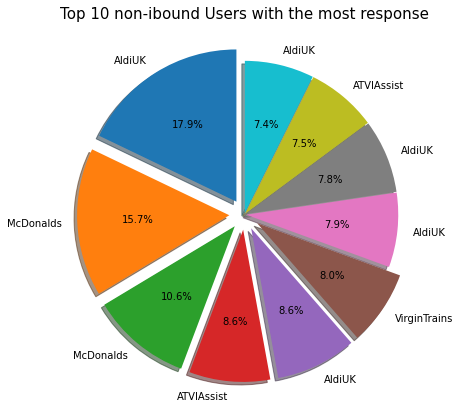

In [14]:
#Top non-inbound response
ordf = odf[odf['response_tweet_id'].notnull()]

orcount = ordf['response_tweet_id'].apply(lambda x: len(x.split(',')))
orcdf = pd.DataFrame({'author_id': odf['author_id'],
     'response_tweet_id': odf['response_tweet_id'],
     'response_count': orcount
    })
orcdf_10 = orcdf.sort_values(by="response_count", ascending=False)[:10]
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(orcdf_10['response_count'], labels = orcdf_10['author_id'],startangle=90, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1,0.1,0.01,0.01,0.01,0.01,))
ax.set_title("Top 10 non-ibound Users with the most response", fontsize = 15)

plt.show()

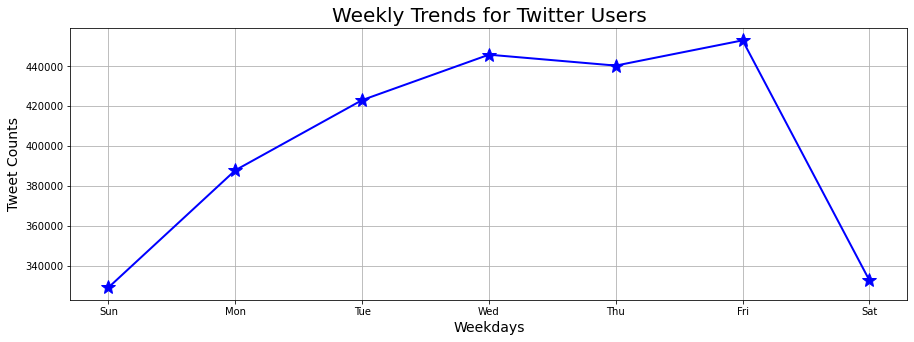

In [15]:
#Time series analysis
date = df['created_at']
#create a new dataframe to sort usernames and dates
ddf = pd.DataFrame({'author_id': df['author_id'],
     'dates': df['created_at'],
    })
#Extract the first 3 letters
ddf['weekdays'] = ddf['dates'].str[:3]
wkdays = ddf['weekdays'].value_counts()
wkdf = pd.DataFrame({'counts':ddf['weekdays'].value_counts()
    })
wkdf = wkdf.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
wkdf = wkdf.reset_index(level=0)
fig = plt.figure(figsize = (15, 5))

plt.plot(wkdf['index'], wkdf['counts'], color='blue', marker='*',linewidth=2, markersize=15)
plt.title('Weekly Trends for Twitter Users', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.show()

In [16]:
#weekly trend for inbound users
#create a new dataframe to sort usernames and dates
iddf = pd.DataFrame({'author_id': ndf['author_id'],
     'dates': ndf['created_at'],
    })
#Extract the first 3 letters
iddf['weekdays'] = iddf['dates'].str[:3]
iwkdays = iddf['weekdays'].value_counts()
iwkdf = pd.DataFrame({'counts':iddf['weekdays'].value_counts()
    })
iwkdf = iwkdf.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
iwkdf = iwkdf.reset_index(level=0)


In [17]:
#weekly trend for outbound users
#create a new dataframe to sort usernames and dates
oddf = pd.DataFrame({'author_id': odf['author_id'],
     'dates': odf['created_at'],
    })
#Extract the first 3 letters
oddf['weekdays'] = oddf['dates'].str[:3]
owkdays = oddf['weekdays'].value_counts()
owkdf = pd.DataFrame({'counts':oddf['weekdays'].value_counts()
    })
owkdf = owkdf.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
owkdf = owkdf.reset_index(level=0)


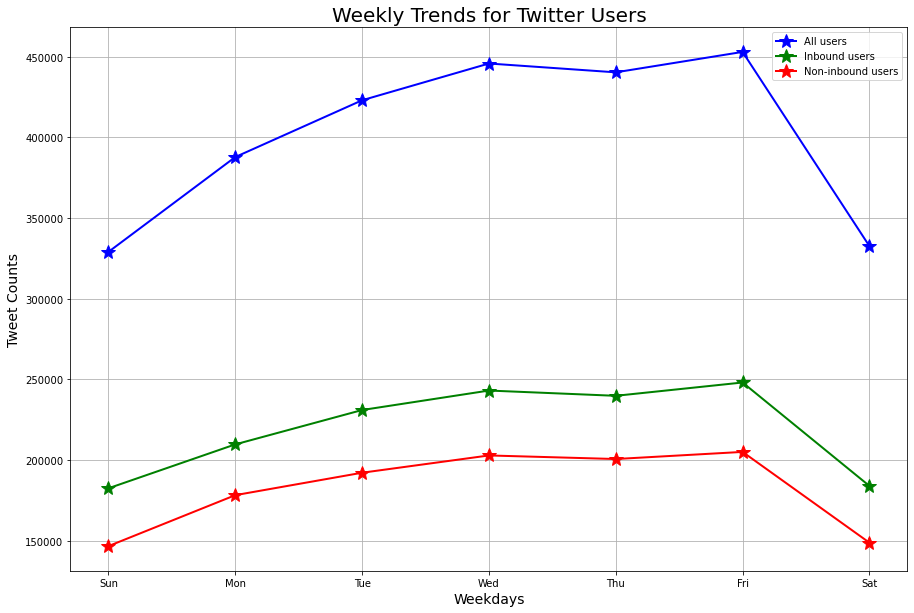

In [18]:
fig = plt.figure(figsize = (15, 10))

plt.plot(wkdf['index'], wkdf['counts'], color='blue', marker='*',linewidth=2, markersize=15,label='All users')
plt.plot(iwkdf['index'], iwkdf['counts'], color='green', marker='*',linewidth=2, markersize=15,label='Inbound users')
plt.plot(owkdf['index'], owkdf['counts'], color='red', marker='*',linewidth=2, markersize=15,label='Non-inbound users')

plt.title('Weekly Trends for Twitter Users', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

In [19]:
df['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

Interpretation: On average, inbound users have more tweets than outbound users. The majority of the tweets by outbound users are contributed by the top percentile chatbots.

In [20]:
ddf1 = pd.DataFrame({'author_id': df['author_id'],
     'dates': df['created_at'],
    })
ddf1

,author_id,dates
0,sprintcare,Tue Oct 31 22:10:47 +0000 2017
1,115712,Tue Oct 31 22:11:45 +0000 2017
2,115712,Tue Oct 31 22:08:27 +0000 2017
3,sprintcare,Tue Oct 31 21:54:49 +0000 2017
4,115712,Tue Oct 31 21:49:35 +0000 2017
...,...,...
2811769,sprintcare,Wed Nov 22 08:43:51 +0000 2017
2811770,823869,Wed Nov 22 08:35:16 +0000 2017
2811771,121673,Thu Nov 23 04:13:07 +0000 2017
2811772,AldiUK,Wed Nov 22 08:31:24 +0000 2017


In [21]:
ddf1['dates'] = pd.to_datetime(ddf1['dates'])

In [23]:
ddf1['Year'] = ddf1.dates.dt.year
ddf1['Month'] = ddf1.dates.dt.month
ddf1['Day'] = ddf1.dates.dt.day
ddf1['Time'] = ddf1.dates.dt.time

In [24]:
ddf1

,author_id,dates,Year,Month,Day,Time
0,sprintcare,2017-10-31 22:10:47+00:00,2017,10,31,22:10:47
1,115712,2017-10-31 22:11:45+00:00,2017,10,31,22:11:45
2,115712,2017-10-31 22:08:27+00:00,2017,10,31,22:08:27
3,sprintcare,2017-10-31 21:54:49+00:00,2017,10,31,21:54:49
4,115712,2017-10-31 21:49:35+00:00,2017,10,31,21:49:35
...,...,...,...,...,...,...
2811769,sprintcare,2017-11-22 08:43:51+00:00,2017,11,22,08:43:51
2811770,823869,2017-11-22 08:35:16+00:00,2017,11,22,08:35:16
2811771,121673,2017-11-23 04:13:07+00:00,2017,11,23,04:13:07
2811772,AldiUK,2017-11-22 08:31:24+00:00,2017,11,22,08:31:24


Text(0, 0.5, 'Number of Tweets')

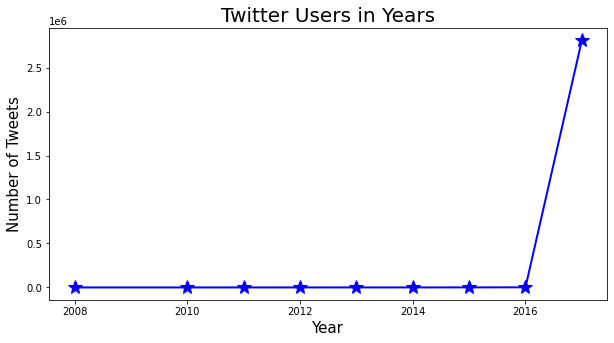

In [25]:
ydf = ddf1['Year'].value_counts()
year_df = ydf.reset_index(level=0)
fig = plt.figure(figsize = (10, 5))
plt.plot(year_df['index'],year_df['Year'],color='blue', marker='*',linewidth=2, markersize=15)
plt.title("Twitter Users in Years", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)

Text(0, 0.5, 'Number of Tweets')

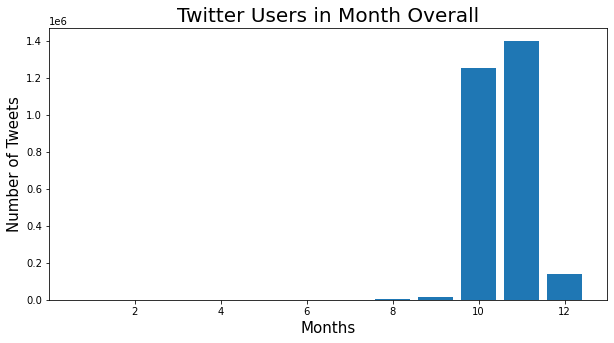

In [26]:
#ddf1['Month'].value_counts().plot(kind='bar')
mdf = ddf1['Month'].value_counts()
month_df = mdf.reset_index(level=0)
month_df.sort_values(by="index", ascending=True)

fig = plt.figure(figsize = (10, 5))
plt.bar(month_df['index'], month_df['Month'])#,color='orange', marker='*',linewidth=2, markersize=15)
#plt.plot(month_df['index'], month_df['Month'],color='orange', marker='*',linewidth=2, markersize=15)

plt.title("Twitter Users in Month Overall", fontsize = 20)
plt.xlabel("Months", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)

Text(0, 0.5, 'Number of Tweets')

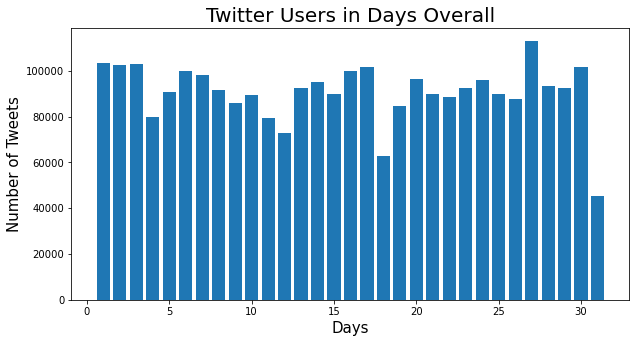

In [27]:
#ddf1['Day'].value_counts()
dddf = ddf1['Day'].value_counts()
day_df = dddf.reset_index(level=0)

fig = plt.figure(figsize = (10, 5))
plt.bar(day_df['index'], day_df['Day'])#,color='orange', marker='*',linewidth=2, markersize=15)

plt.title("Twitter Users in Days Overall", fontsize = 20)
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)

In [28]:
#Time analysis
tdf = ddf1['Time'].value_counts()
time_df = tdf.reset_index(level=0)
time_df.sort_values(by="Time", ascending=False)[:15]

,index,Time
0,17:55:00,191
1,17:23:00,191
2,20:33:00,188
3,18:23:00,187
4,17:44:00,187
5,15:53:00,186
6,16:24:00,185
7,16:36:00,181
8,15:42:00,181
9,17:27:00,181


In [ ]:
# top9_month = month_df[:9]
# top9_month

In [ ]:
# sns.set()
# trends = ddf1.pivot(top9_month['index'], year_df['index'], top9_month['Month'])
# ax = sns.heatmap(trends)
# plt.title("Heatmap Twitter Trend Data")
# plt.show()